# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

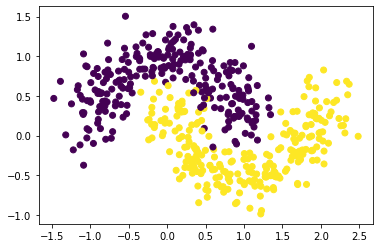

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', C=0.39) # add some params
svm = SVC(kernel='linear', C=0.1) # here too

### YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score

def show_f1_and_accuracy(y_test, y_pred):
    print(f'Weighted F1 Score {f1_score(y_test, y_pred, average="weighted")}')
    print(f'Accuracy Score {accuracy_score(y_test, y_pred)}')

def plot_decisions(X_train, y_train, estimator, title = ""):
    plt.figure(figsize=(11, 9))
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_train)
    show_f1_and_accuracy(y_train, preds)
    plot_decision_regions(X=X_train, y=y_train, clf=estimator, legend=2)
    plt.title(title)
    plt.show()

Weighted F1 Score 0.8579994319977281
Accuracy Score 0.858


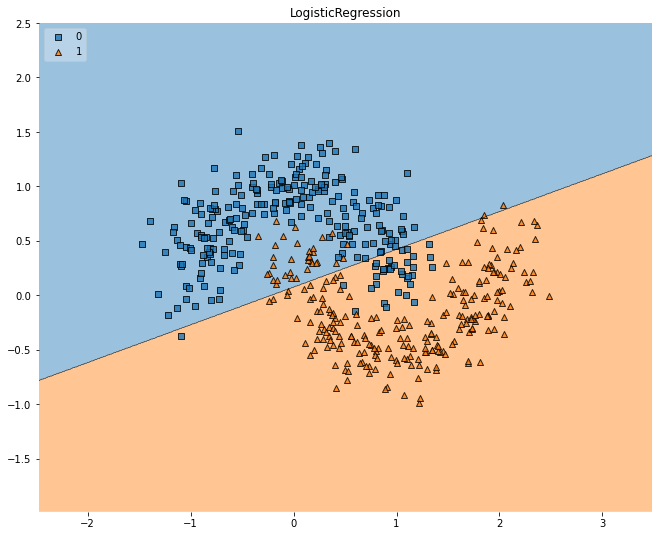

In [16]:
plot_decisions(moons_points, moons_labels, lr, "LogisticRegression")

Weighted F1 Score 0.8579994319977281
Accuracy Score 0.858


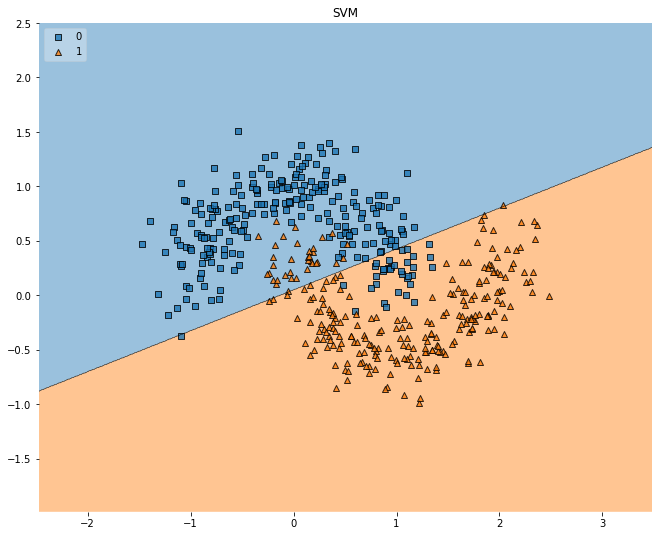

In [17]:
plot_decisions(moons_points, moons_labels, svm, "SVM")

As we can see Logistic Regression is not very suitable to apply to nonlinear data.
SVM with linear kernel is not suitable as well.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Weighted F1 Score 0.8579994319977281
Accuracy Score 0.858


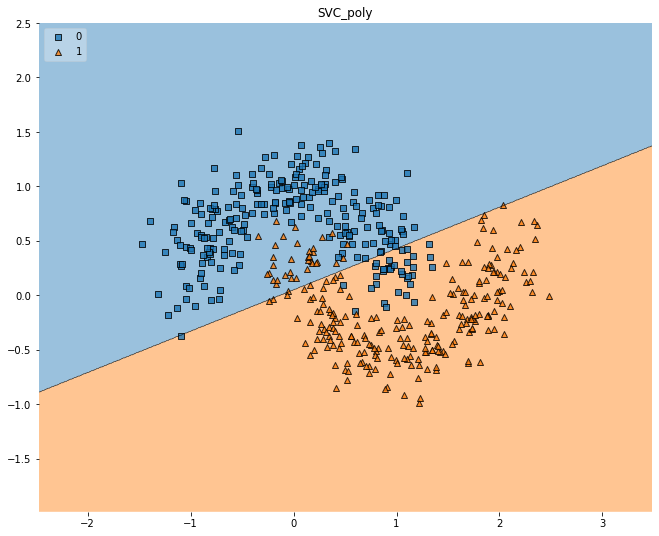

In [30]:
### YOUR CODE HERE
SVC_poly = SVC(kernel='poly', degree=1, C=0.1)
plot_decisions(moons_points, moons_labels, SVC_poly, "SVC_poly")

Weighted F1 Score 0.9459824983294586
Accuracy Score 0.946


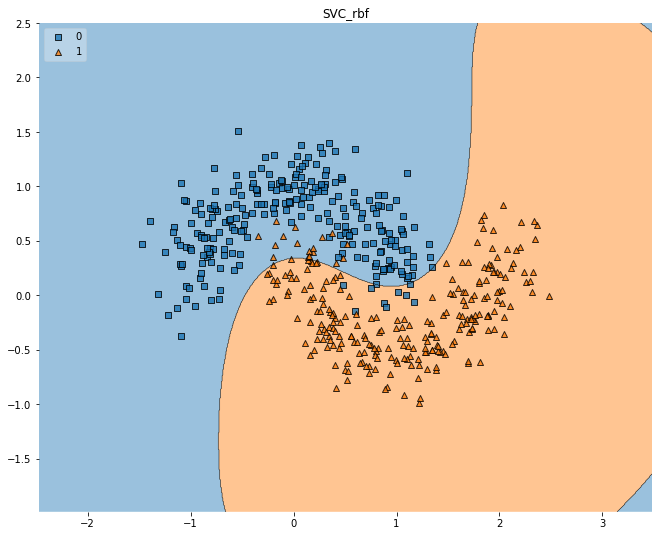

In [31]:
SVC_rbf = SVC(kernel='rbf', C=0.1)
plot_decisions(moons_points, moons_labels, SVC_rbf, "SVC_rbf")

Weighted F1 Score 0.7110939907550078
Accuracy Score 0.712


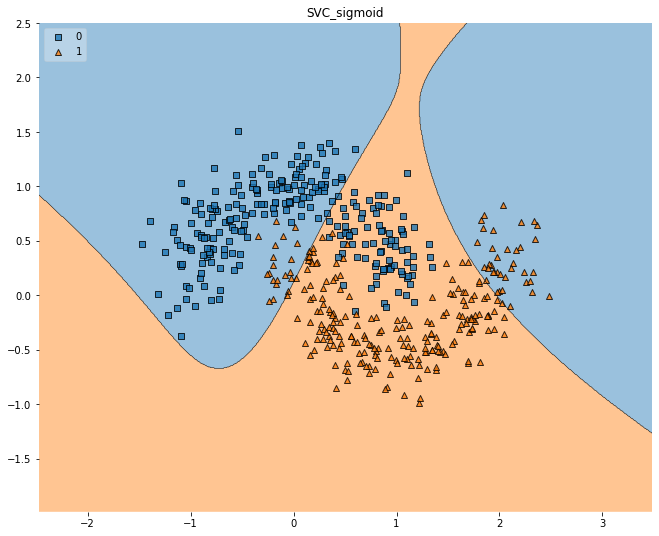

In [46]:
SVC_sigmoid = SVC(kernel='sigmoid', C=0.1)
plot_decisions(moons_points, moons_labels, SVC_sigmoid, "SVC_sigmoid")

* What have happenned with classification quality?

Classification quality is extremelly different for different kernels.
* How did decision border changed for each kernel?

There was no change for poly kernel. RBF showed the best result and achieved accuracy of 0.946. Sigmoid had the worst decisioin border.
* What `degree` have you chosen and why?

I have chosen degree=1 for poly as it showed best result. For rbf and sigmoid I have chosen default degree=3 as rbf has already shown quite a preformance and sigmoid didn't show any significant improvements for larger degrees.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Weighted F1 Score 0.8910780849106841
Accuracy Score 0.892


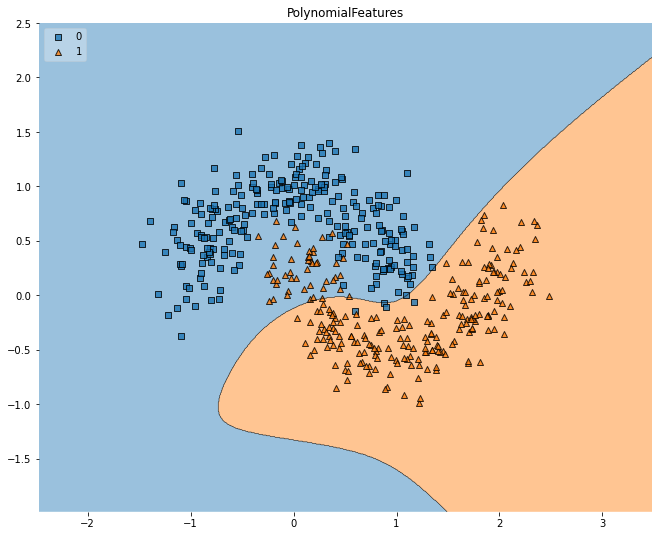

Weighted F1 Score 0.8992893859069595
Accuracy Score 0.9


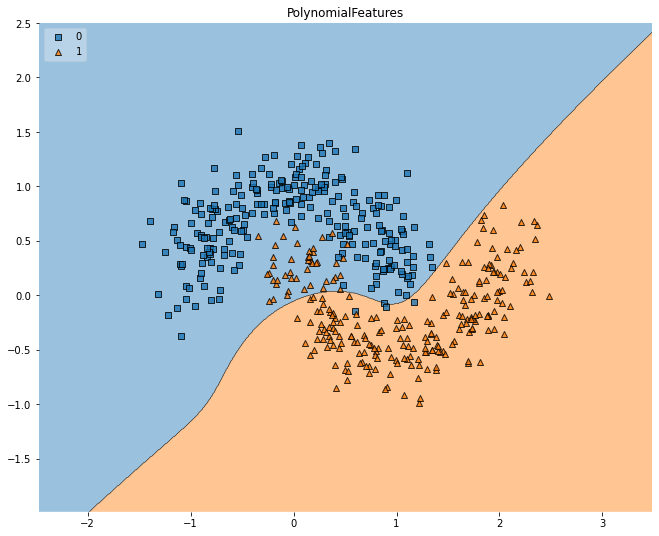

Weighted F1 Score 0.9012697913770246
Accuracy Score 0.902


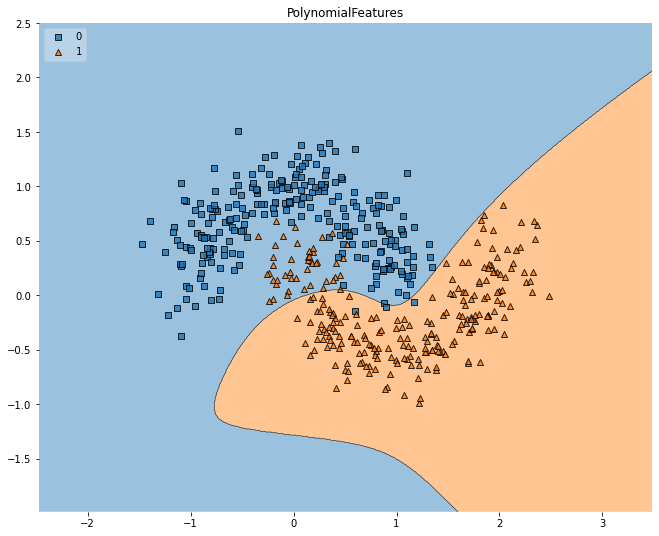

Weighted F1 Score 0.9053636652853788
Accuracy Score 0.906


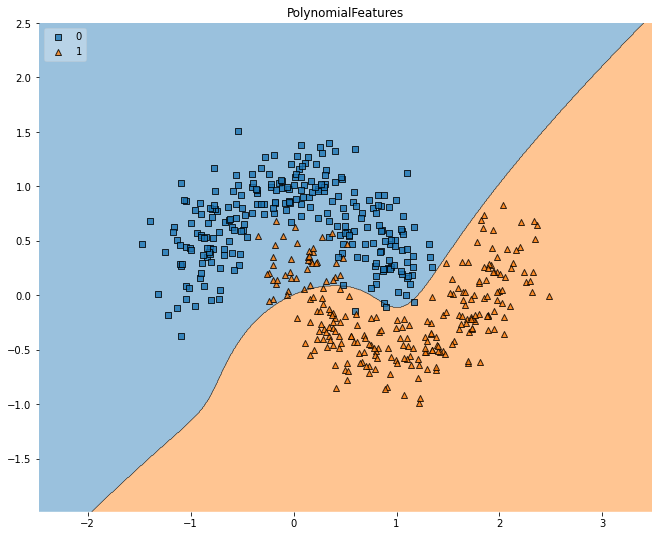

Weighted F1 Score 0.9033816425120773
Accuracy Score 0.904


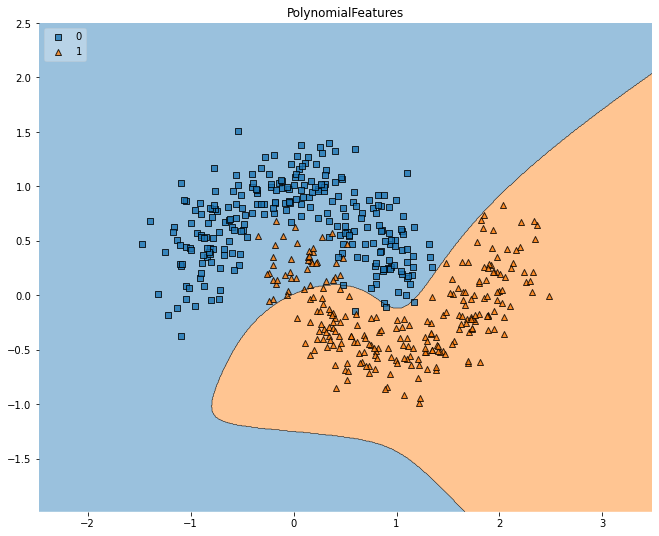

Weighted F1 Score 0.9074655208484204
Accuracy Score 0.908


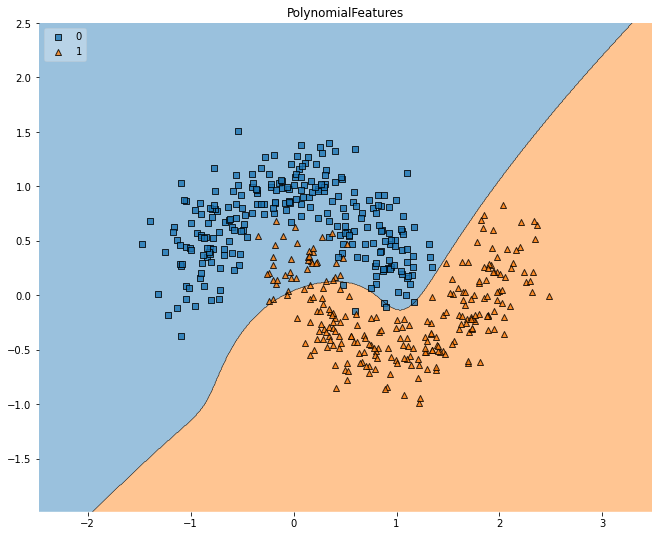

Weighted F1 Score 0.9074655208484204
Accuracy Score 0.908


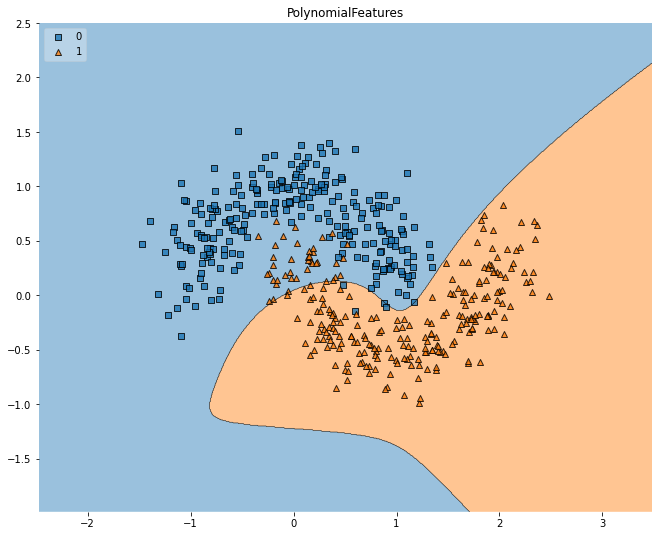

Weighted F1 Score 0.9156097796209675
Accuracy Score 0.916


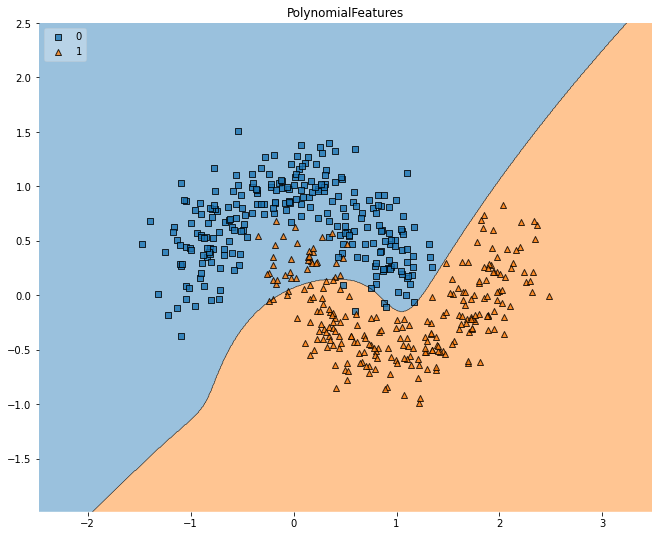

Weighted F1 Score 0.9176412452643715
Accuracy Score 0.918


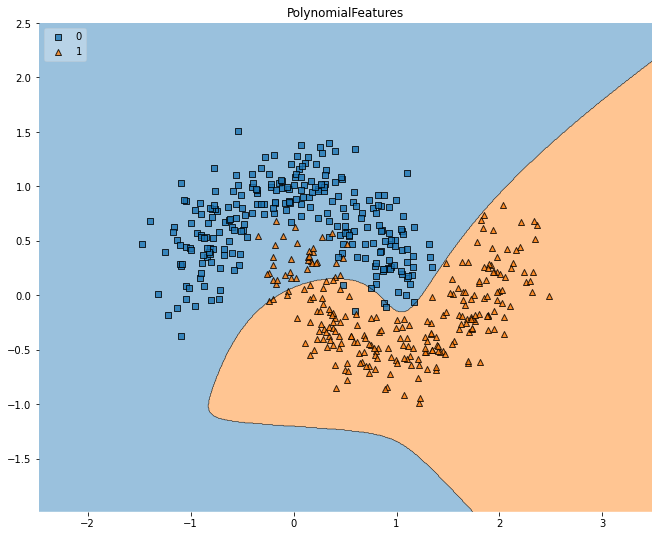

Weighted F1 Score 0.9197109594540346
Accuracy Score 0.92


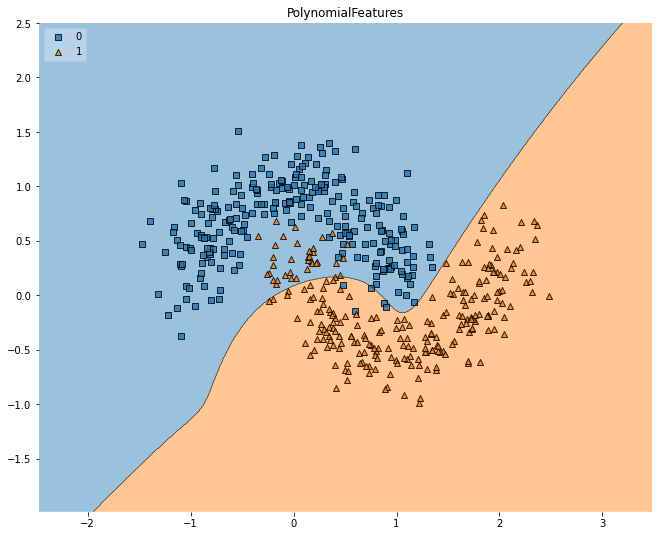

In [48]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
from sklearn.pipeline import Pipeline

for i in range(10, 20):
    pipeline = Pipeline([('PolynomialFeatures', PolynomialFeatures(degree=i)), ('estimator', LogisticRegression(C=0.01))])
    plot_decisions(moons_points, moons_labels, pipeline, "PolynomialFeatures")

* Comare SVM's results with this solution (quality, borders type)

Borders tend to have similar turns in the center. Quality gets better with larger number of polynomial features. Performance for degree 20 is very good yet still not as good as for the RBF.

* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

I used degrees from 10 to 20 that is much higher then used for SVM kernel.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

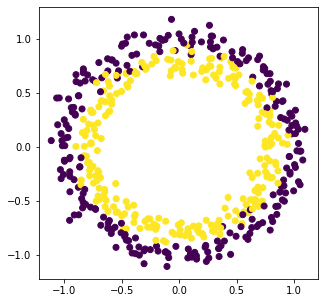

In [52]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

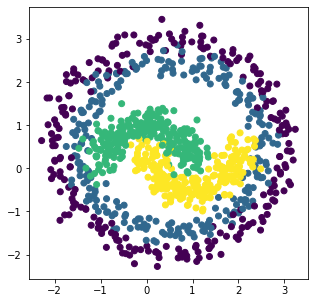

In [53]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Weighted F1 Score 0.9300555305536494
Accuracy Score 0.93


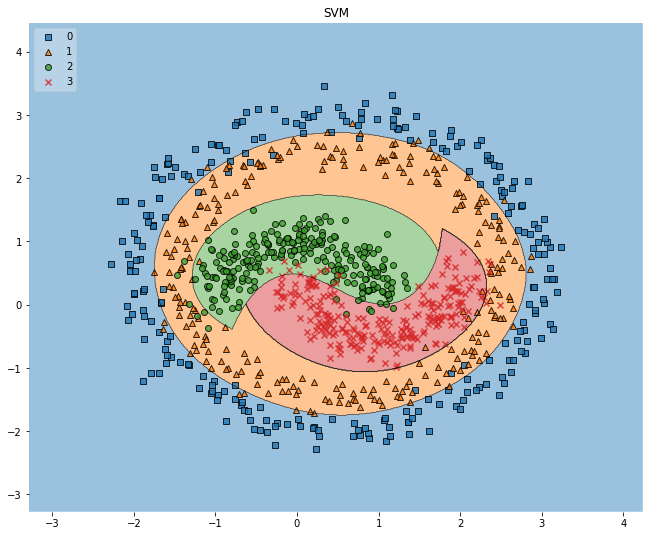

In [55]:
### YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params = {'C': [i * 0.1 for i in range(1, 10)]}

gs_svm = GridSearchCV(SVC(kernel='rbf', gamma='auto'), param_grid=params, cv=5)
gs_svm.fit(points, labels)

plot_decisions(points, labels, gs_svm.best_estimator_, "SVM")


Weighted F1 Score 0.864051697277719
Accuracy Score 0.864


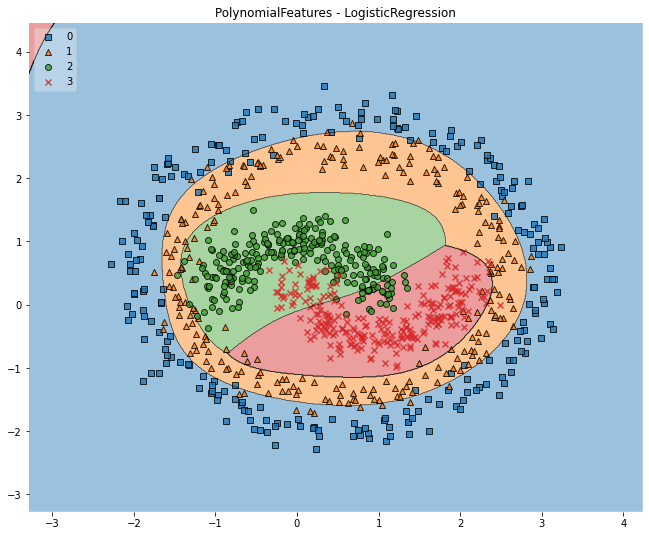

Weighted F1 Score 0.8767625808835405
Accuracy Score 0.877


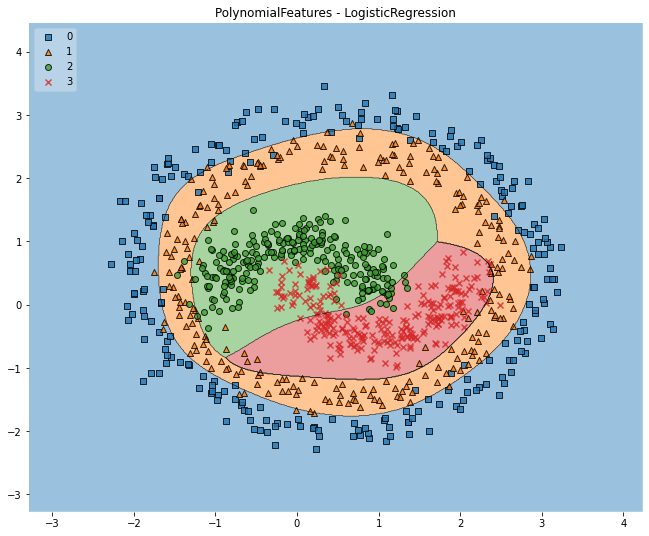

In [59]:
for i in range(5, 7):
    pipeline = Pipeline([('PolynomialFeatures', PolynomialFeatures(degree=i)), ('estimator', LogisticRegression(C=0.01))])
    plot_decisions(points, labels, pipeline, "PolynomialFeatures - LogisticRegression")

Even on the harder problem we were able to select hyperparameters on the models chosen before as the best ones and showed decent level of performance.